In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
block_sizes = [2**i for i in range(11)]
grid_sizes = [40960000 // (2**i) for i in range(11)]
labels = ['Input','GPU','Output','CPU','Total']

In [3]:
def retrieve_time(s):
    return float(s.split(': ')[1].split('(ms)')[0])
def parse_file(path):
    with open(path, 'r') as fp:
        s = fp.read().split('\n')
    return map(retrieve_time, [s[7], s[8], s[10], s[12]])

In [4]:
mat = [np.zeros((len(block_sizes), len(grid_sizes))) for _ in range(5)]
for i, grid in enumerate(grid_sizes):
    for j, block in enumerate(block_sizes):
        for k, t in enumerate(parse_file(f'../results/Output_{block}_{grid}')):
            mat[k][i,j] = t
        mat[4][i,j] = mat[0][i,j]+mat[1][i,j]+mat[2][i,j]

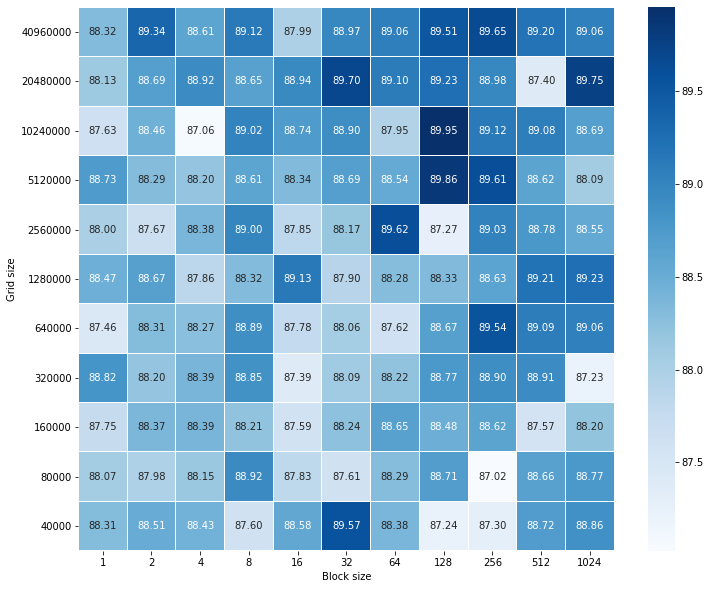

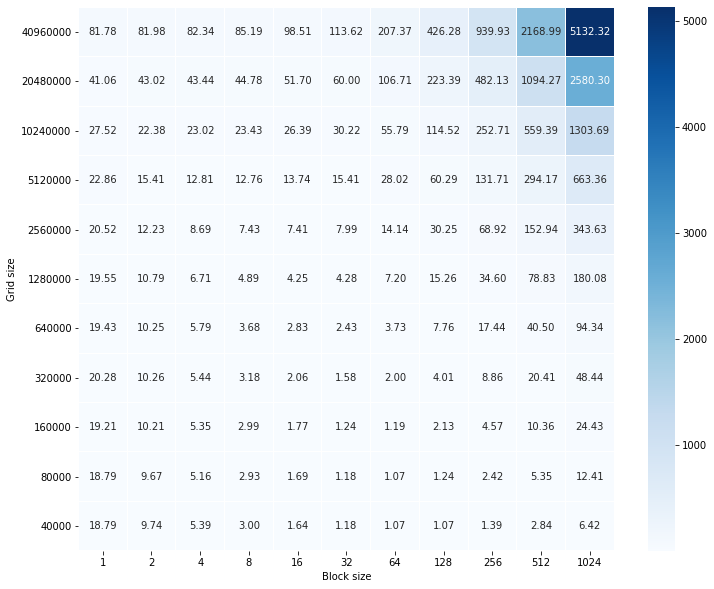

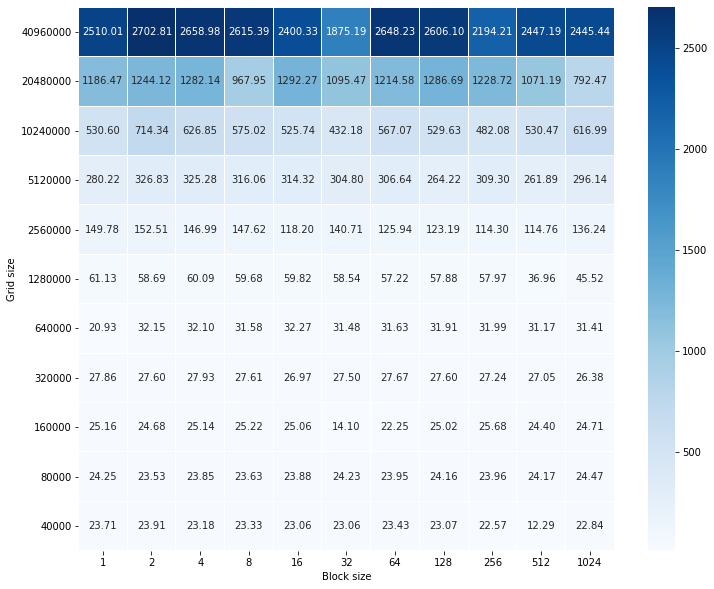

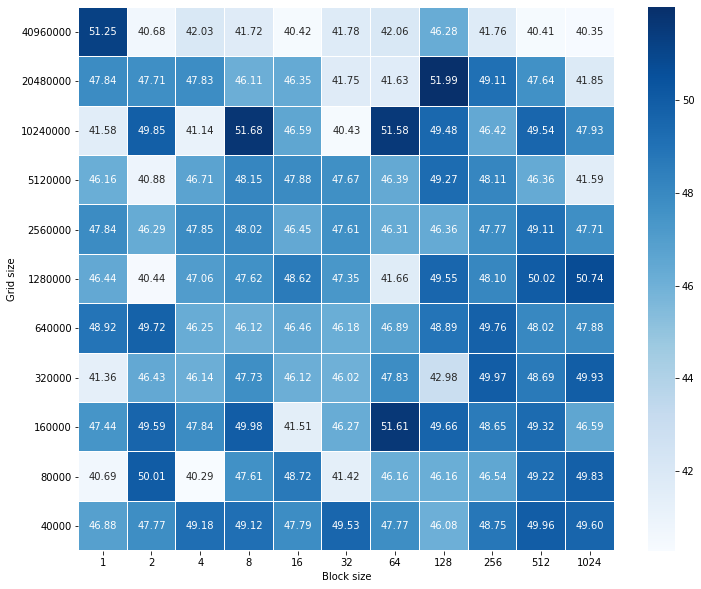

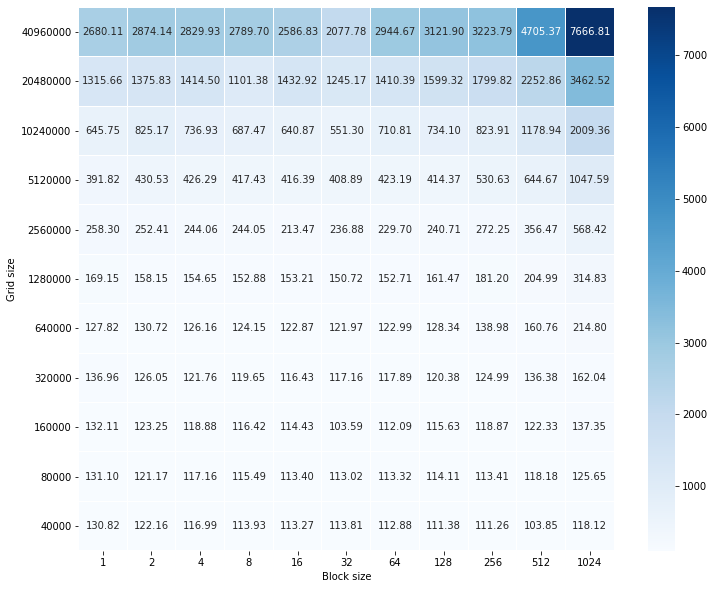

In [5]:
for i in range(5):
    fig, ax = plt.subplots(figsize=(12,10))
    ax = sns.heatmap(mat[i], annot=True, cmap="Blues",
                     fmt=".2f", xticklabels=block_sizes,
                     yticklabels=grid_sizes, linewidths=.005)
    plt.xlabel('Block size')
    plt.ylabel('Grid size')
    plt.savefig(f'images/{labels[i]}.pdf')